In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d.axes3d import Axes3D    # allows 3D plots
### %matplotlib inline
%matplotlib notebook

In [2]:
from matplotlib import rcParams
rcParams.update({'font.size': 14})

#### Inline Graphiken

    %matplotlib inline

- bleiben als Bild im Notebook erhalten

#### Interaktive Graphiken

    %matplotlib notebook

- funktionieren *interaktiv* nur mit laufendem Kernel (Java)
- bleiben als Bild im Notebook erhalten (Abspeichern mit *aktiver* Graphik)

#### Version

    conda install matplotlib
        2.0.2-np111py35_0
    
- ab matplotlib 1.4 (ungetestet)

# PCA - with interactive 3D Plots


# Datenreduktion II
####  Weitere Dimension(en) 
- Schlafdauer

gerade noch anschaulich: 3D

In [3]:
import pandas as pd
animals = pd.read_csv('data/animals.txt', sep='\t')  # read data
data = animals[['BodyWt', 'BrainWt', 'TotalSleep']]
data = data.dropna(axis=0)    # drop lines (axis=0) without all values
data['log_BodyWt'] = np.log10(animals['BodyWt'])
data['log_BrainWt'] = np.log10(animals['BrainWt'])-3
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 60
Data columns (total 5 columns):
BodyWt         58 non-null float64
BrainWt        58 non-null float64
TotalSleep     58 non-null float64
log_BodyWt     58 non-null float64
log_BrainWt    58 non-null float64
dtypes: float64(5)
memory usage: 2.7 KB


shape of data v: (3, 58)


<IPython.core.display.Javascript object>


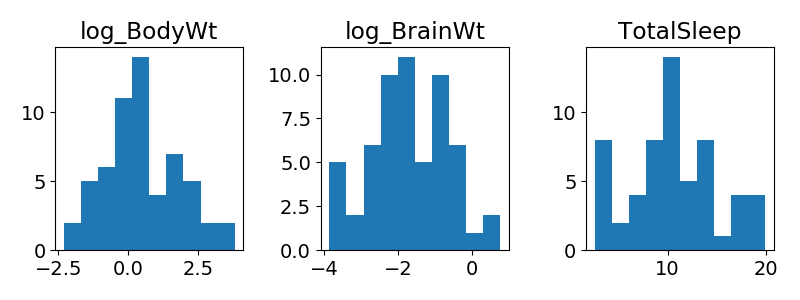

Means:               [  0.496  -1.689  10.533]
Standard deviations: [ 1.3325  1.0555  4.5669]


In [4]:
variables = ['log_BodyWt', 'log_BrainWt', 'TotalSleep']
v = np.asarray(data[variables]).T
print('shape of data v: {}'.format(v.shape))
fig = plt.figure(figsize=(8,3))
for i in range(v.shape[0]):
    fig.add_subplot(1, 3, i+1)
    plt.hist(v[i])
    plt.title(variables[i])  
vmeans = v.mean(axis=1)
vstds = v.std(axis=1)
print('Means:               {}'.format(np.round(vmeans, decimals=3)))
print('Standard deviations: {}'.format(np.round(vstds, decimals=4)))
plt.tight_layout();

<IPython.core.display.Javascript object>


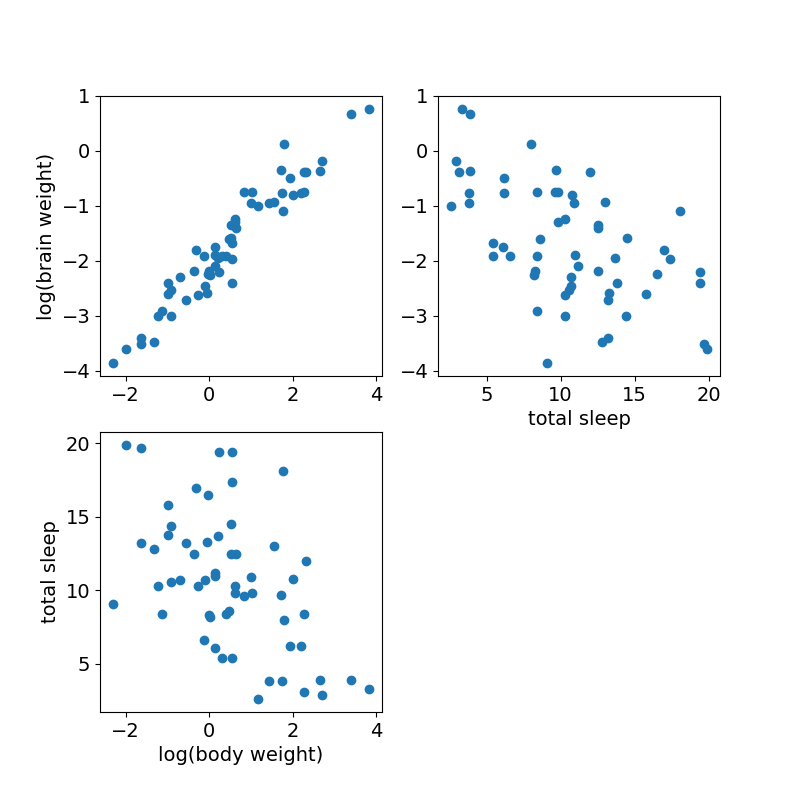

In [5]:
fig = plt.figure(figsize=(8, 8))
fig.add_subplot(2, 2, 1)
plt.scatter(v[0], v[1])
plt.ylabel('log(brain weight)')
fig.add_subplot(2, 2, 2)
plt.scatter(v[2], v[1])
plt.xlabel('total sleep')
fig.add_subplot(2, 2, 3)
plt.scatter(v[0], v[2])
plt.xlabel('log(body weight)')
plt.ylabel('total sleep')
plt.show();

In [6]:
'''run once to allow 3D plotting'''
from mpl_toolkits.mplot3d.axes3d import Axes3D    # allows 3D plots

In [ ]:
'''just for information: transition from older matplotlib'''

# instead of:
%matplotlib qt              # Error:   cannot import name 'QtCore'  

# use this    v--------     # to allow interactive plots in a live notebook (not slides)
%matplotlib notebook

# ax = fig.add_subplot(1, 1, 1, projection='3d')     # deprecated
ax = Axes3D(fig)                                     # new recommended 

# now, without plt.show(), an interactive 3D image shows up within the notebook

<IPython.core.display.Javascript object>


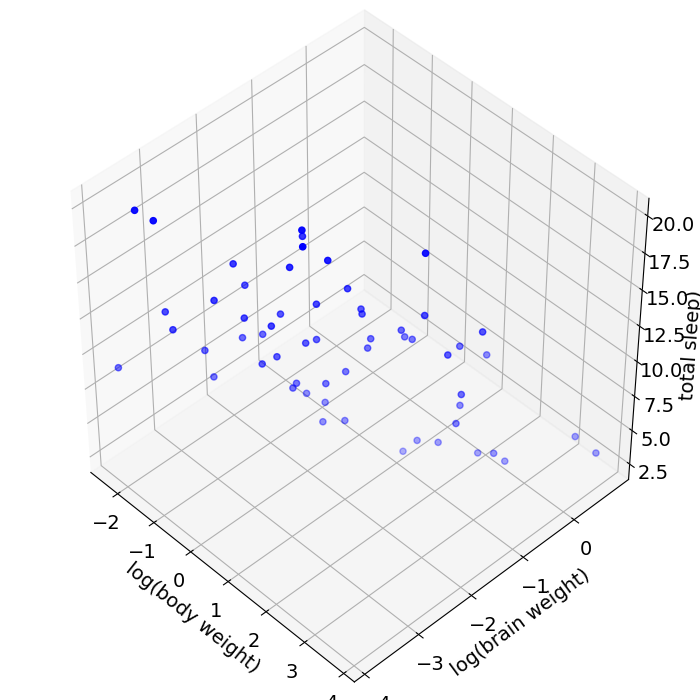

In [7]:
fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig)

ax.scatter(v[0], v[1], v[2], c='b', marker='o')
ax.view_init(elev=60, azim=-45)
ax.set_xlabel('log(body weight)')
ax.set_ylabel('log(brain weight)')
ax.set_zlabel('total sleep)');

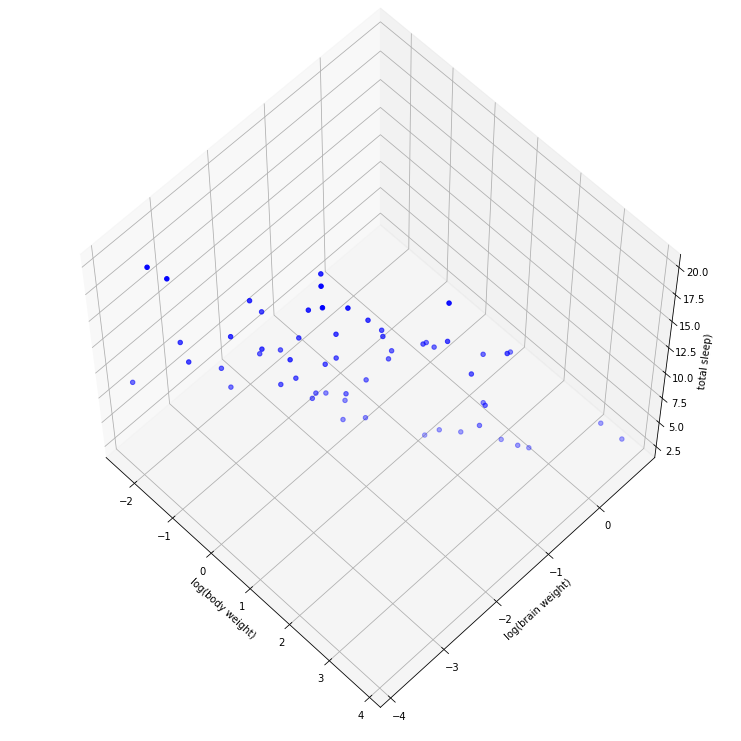

In [8]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.scatter(v[0], v[1], v[2], c='b', marker='o')
ax.view_init(elev=60, azim=-45)
ax.set_xlabel('log(body weight)')
ax.set_ylabel('log(brain weight)')
ax.set_zlabel('total sleep)');

In [9]:
'''helper functions for arrow-plotting'''
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


In [10]:
'''subtract mean and calculate variances'''
print('data shape v = {}'.format(v.shape))
vmeans = v.mean(axis=1)
a = (v.T-vmeans).T
print('data shape a = {}'.format(a.shape))
variances = a.var(axis=1)
print('animals data a have variances {}'.format(variances))
print('data Matrix A has shape {}'.format(a.shape))
C = 1./a.shape[1] * np.dot(a, a.T)
print('covariance matrix C has shape {}'.format(C.shape))
print(C)

data shape v = (3, 58)
data shape a = (3, 58)
animals data a have variances [  1.77549851   1.11417243  20.85634067]
data Matrix A has shape (3, 58)
covariance matrix C has shape (3, 3)
[[  1.77549851   1.34779228  -3.24243701]
 [  1.34779228   1.11417243  -2.71201272]
 [ -3.24243701  -2.71201272  20.85634067]]


In [11]:
'''diagonalize'''
EW, EV = np.linalg.eig(C)

# test if really Eigenvalue / -vectors
for i in range(min(C.shape[0]-1, a.shape[1])-1):
    np.testing.assert_allclose(np.dot(C, EV.T[i]), EW[i]*EV.T[i])
# no exception means: they are (very close to) zero
print('Eigenvalues: {}'.format(EW))
print(EV, '... and their Eigenvectors')

Eigenvalues: [ 21.79836202   1.89180472   0.05584485]
[[-0.16740802 -0.77766136 -0.60598462]
 [-0.13888425 -0.58992713  0.79542262]
 [ 0.97605621 -0.21732184  0.00924638]] ... and their Eigenvectors


In [12]:
'''projection matrix W'''
liste = [(np.abs(EW[i]), EV.T[i]) for i in range(EW.shape[0])]
liste.sort()
liste.reverse()
# take only first 2 main directions with biggest EW
W = np.hstack((liste[0][1].reshape(3,1), liste[1][1].reshape(3,1)))
print('Matrix W: \n{}'.format(W))

Matrix W: 
[[-0.16740802 -0.77766136]
 [-0.13888425 -0.58992713]
 [ 0.97605621 -0.21732184]]


In [13]:
'''transform into 2D subspace '''
y = W.T.dot(a)    # all 58 datasets in two dimensional subspace of EV1 and EV2

<IPython.core.display.Javascript object>


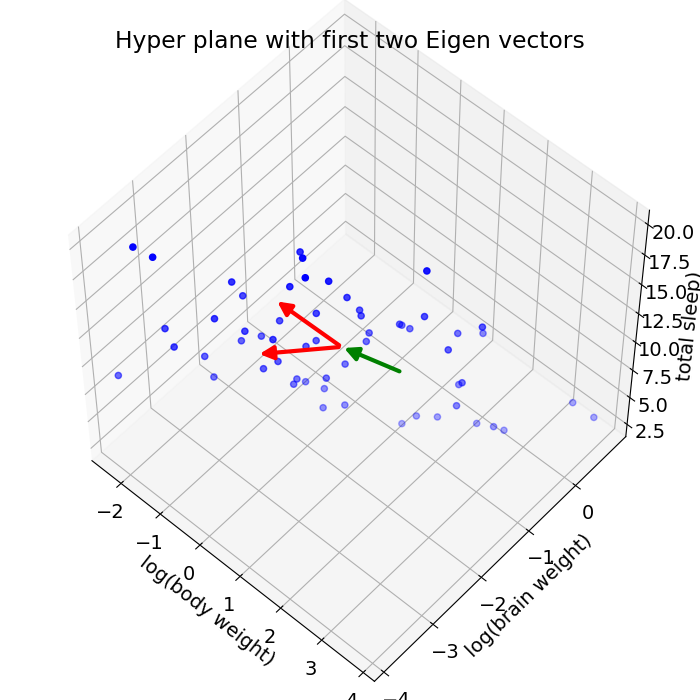

In [14]:
%matplotlib notebook
#              ^---- for interactive plots (deactivates "%matplotlib inline")
fig = plt.figure(figsize=(7, 7))
ax = Axes3D(fig)
ax.scatter(v[0], v[1], v[2], c='b', marker='o')
ax.view_init(elev=60, azim=-45)
ax.set_xlabel('log(body weight)')
ax.set_ylabel('log(brain weight)')
ax.set_zlabel('total sleep)')

vm = np.array(vmeans)
arr = Arrow3D([0, vm[0]], [0, vm[1]], [0, vm[2]], 
              mutation_scale=20, lw=3, arrowstyle="-|>", color="g")
ax.add_artist(arr) 
w = vm + np.sqrt(EW[0])*W.T[0]           # first Eigen vector + mean
# vm = np.array([0, 0, 0])
arr = Arrow3D([vm[0], w[0]], [vm[1], w[1]], [vm[2], w[2]], 
              mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
ax.add_artist(arr)                       # 
w = vm + np.sqrt(EW[1])*W.T[1]           # second Eigen vector + mean
arr = Arrow3D([vm[0], w[0]], [vm[1], w[1]], [vm[2], w[2]], 
              mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
ax.add_artist(arr)                       # 
plt.title('Hyper plane with first two Eigen vectors')
plt.show()
# now, an interactive 3D image shows up

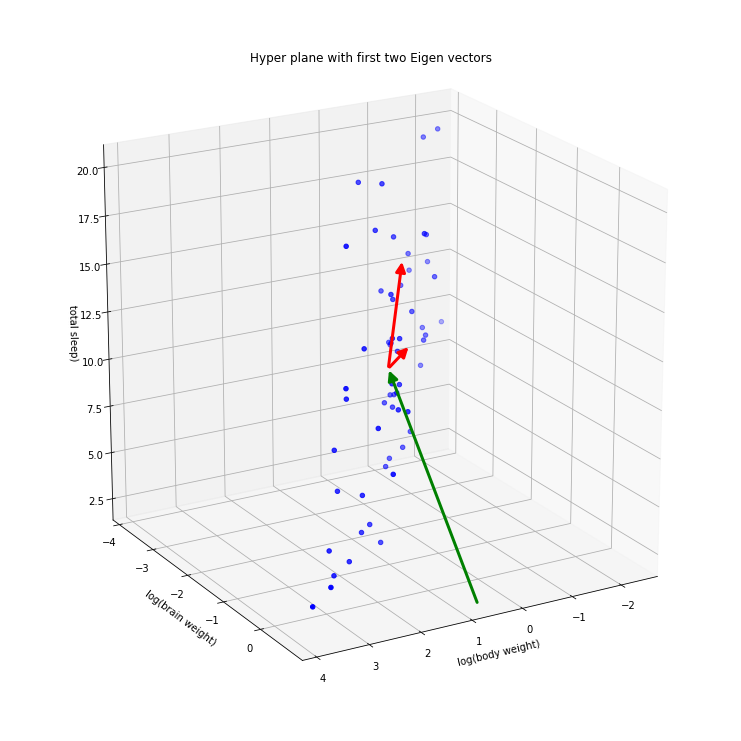

In [15]:
%matplotlib inline
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
ax.scatter(v[0], v[1], v[2], c='b', marker='o')
ax.view_init(elev=20, azim=60)
ax.set_xlabel('log(body weight)')
ax.set_ylabel('log(brain weight)')
ax.set_zlabel('total sleep)')

vm = np.array(vmeans)
arr = Arrow3D([0, vm[0]], [0, vm[1]], [0, vm[2]], 
              mutation_scale=20, lw=3, arrowstyle="-|>", color="g")
ax.add_artist(arr) 
w = vm + np.sqrt(EW[0])*W.T[0]           # first Eigen vector + mean
# vm = np.array([0, 0, 0])
arr = Arrow3D([vm[0], w[0]], [vm[1], w[1]], [vm[2], w[2]], 
              mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
ax.add_artist(arr)                       # 
w = vm + np.sqrt(EW[1])*W.T[1]           # second Eigen vector + mean
arr = Arrow3D([vm[0], w[0]], [vm[1], w[1]], [vm[2], w[2]], 
              mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
ax.add_artist(arr)                       # 
plt.title('Hyper plane with first two Eigen vectors');


# Fragen?